<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [1]:
# Write your code here
import pandas as pd

df = pd.read_csv('avt_review_sentiments.csv', encoding = 'ISO-8859-1')
df.head()

,Unnamed: 0,document_id,clean_text,sentiment
0,0,doc_1,a pretty good movie not quite the masterpiece ...,positive
1,1,doc_2,gotham is in dire difficulties like new york c...,positive
2,2,doc_3,while ive watched many of the superhero movies...,positive
3,3,doc_4,in many aspects it is a mirror for society for...,neutral
4,4,doc_5,in a crumbling gotham city where the governmen...,positive


In [2]:
df_text = df['clean_text']
df_text

0      a pretty good movie not quite the masterpiece ...
1      gotham is in dire difficulties like new york c...
2      while ive watched many of the superhero movies...
3      in many aspects it is a mirror for society for...
4      in a crumbling gotham city where the governmen...
                             ...                        
120    james cameron is known for taking us to new wo...
121    james cameron does learn from his previous eff...
122    recap mankind has gone for the stars and found...
123    at this point the smothering hype machine has ...
124    in the year jake sully a crippled marine is se...
Name: clean_text, Length: 125, dtype: object

In [3]:
import nltk
import re
import string

from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
#stopword = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
#wl = WordNetLemmatizer()

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
#tokenizer = RegexpTokenizer(r'\w+')
#en_stop = get_stop_words('en')
#pstem = PorterStemmer()

[nltk_data] Downloading package wordnet to /Users/thiphan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thiphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text preprocessing

In [4]:
# preprocessing 
df['LowerCase'] = df['clean_text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

Tokenizer = RegexpTokenizer(r'\w+')
df['Tokenization'] = df['LowerCase'].apply(lambda x: Tokenizer.tokenize(x))

en_stop = set(nltk.corpus.stopwords.words('english'))
df['Tokens'] = df['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])

Stemmer = PorterStemmer()
df['Stemming'] = df['Tokens'].apply(lambda x: [Stemmer.stem(i) for i in x])

In [5]:
llist = []
for i in df['Stemming']:
    llist.append(i)
print(llist)

[['pretti', 'good', 'movi', 'quit', 'masterpiec', 'would', 'believ', 'deriv', 'still', 'worth', 'watch', 'there', 'deni', 'joaquin', 'phoenix', 'deliv', 'excel', 'perform', 'titl', 'role', 'main', 'bone', 'content', 'film', 'realli', 'doesnt', 'need', 'tie', 'whole', 'superhero', 'genr', 'set', 'rivalri', 'batman', 'least', 'half', 'run', 'time', 'better', 'film', 'would', 'serv', 'better', 'standalon', 'psycholog', 'portrait', 'mental', 'breakdown', 'film', 'seem', 'inspir', 'includ', 'mechan', 'king', 'comedi', 'cours', 'taxi', 'driver'], ['gotham', 'dire', 'difficulti', 'like', 'new', 'york', 'citi', 'back', '70', 'arthur', 'fleck', 'joaquin', 'phoenix', 'mental', 'unstabl', 'clown', 'laugh', 'uncontrol', 'stress', 'time', 'get', 'beaten', 'rob', 'group', 'youth', 'get', 'fire', 'job', 'live', 'unstabl', 'sick', 'mom', 'franc', 'conroy', 'work', 'thoma', 'wayn', 'claim', 'exlov', 'arthur', 'biolog', 'father', 'arthur', 'attack', 'three', 'drunken', 'suit', 'subway', 'shoot', 'dead',

## Bigrams and Trigrams

In [7]:
from gensim import corpora, models
  
bigram = models.Phrases(llist, min_count=5, threshold=100)
trigram = models.Phrases(bigram[llist], threshold=100)
bigram_model = models.phrases.Phraser(bigram)
trigram_model = models.phrases.Phraser(trigram)
print(trigram_model[bigram_model[llist[0]]])

['pretti', 'good', 'movi', 'quit', 'masterpiec', 'would', 'believ', 'deriv', 'still', 'worth', 'watch', 'there', 'deni', 'joaquin_phoenix', 'deliv', 'excel', 'perform', 'titl', 'role', 'main', 'bone', 'content', 'film', 'realli', 'doesnt', 'need', 'tie', 'whole', 'superhero', 'genr', 'set', 'rivalri', 'batman', 'least', 'half', 'run', 'time', 'better', 'film', 'would', 'serv', 'better', 'standalon', 'psycholog', 'portrait', 'mental', 'breakdown', 'film', 'seem', 'inspir', 'includ', 'mechan', 'king_comedi', 'cours', 'taxi_driver']


## (1) Features (top n-gram phrases) used for topic modeling

In [8]:
def Bigrams(llist):
    return [bigram_model[doc] for doc in llist]

def Trigrams(llist):
    return [trigran_model[trigran_model[doc]] for doc in llist]

def lemmatization(text, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
    output = []
    
    for i in llist:
        doc = nlp(" ".join(i)) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
    return output

In [9]:
import spacy

bigrams_data = Bigrams(llist)

nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])
lemma_data = lemmatization(bigrams_data, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])
print(lemma_data[:1])

[['good', 'quit', 'masterpiec', 'believ', 'deriv', 'still', 'worth', 'watch', 'there', 'excel', 'perform', 'titl', 'role', 'main', 'bone', 'content', 'film', 'do', 'need', 'tie', 'whole', 'superhero', 'set', 'batman', 'least', 'half', 'run', 'time', 'well', 'film', 'serv', 'well', 'psycholog', 'portrait', 'mental', 'breakdown', 'film', 'seem', 'taxi', 'driver']]


### Corpus

In [10]:
dictionary = corpora.Dictionary(lemma_data)
list_lemmadata = lemma_data
corpus = [dictionary.doc2bow(list) for list in list_lemmadata]
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1)]]


In [11]:
dictionary[0]

'batman'

In [12]:
dictionary[1]

'believ'

In [13]:
[[(dictionary[dip], freq) for dip, freq in cip] for cip in corpus[:1]]

[[('batman', 1),
  ('believ', 1),
  ('bone', 1),
  ('breakdown', 1),
  ('content', 1),
  ('deriv', 1),
  ('do', 1),
  ('driver', 1),
  ('excel', 1),
  ('film', 3),
  ('good', 1),
  ('half', 1),
  ('least', 1),
  ('main', 1),
  ('masterpiec', 1),
  ('mental', 1),
  ('need', 1),
  ('perform', 1),
  ('portrait', 1),
  ('psycholog', 1),
  ('quit', 1),
  ('role', 1),
  ('run', 1),
  ('seem', 1),
  ('serv', 1),
  ('set', 1),
  ('still', 1),
  ('superhero', 1),
  ('taxi', 1),
  ('there', 1),
  ('tie', 1),
  ('time', 1),
  ('titl', 1),
  ('watch', 1),
  ('well', 2),
  ('whole', 1),
  ('worth', 1)]]

## (2) Top 10 clusters for topic modeling

### LDA model

In [14]:
lda_model = models.ldamodel.LdaModel(corpus = corpus,
                                    id2word = dictionary,
                                    num_topics = 10, 
                                    random_state = 100,
                                    update_every = 1,
                                    chunksize = 100,
                                    passes = 10,
                                    alpha = 'auto',
                                    per_word_topics = True)


In [49]:
# view the topics in LDA model by using print_topics

from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"manag" + 0.009*"deriv" + 0.008*"wellworn" + 0.008*"rewatch" + '
  '0.008*"european" + 0.008*"stock" + 0.008*"fragil" + 0.008*"unrealist" + '
  '0.007*"shallow" + 0.004*"rather"'),
 (1,
  '0.009*"chief" + 0.008*"surrog" + 0.008*"cool" + 0.008*"realiti" + '
  '0.007*"approach" + 0.007*"exact" + 0.007*"environ" + 0.007*"sever" + '
  '0.007*"rock" + 0.007*"boss"'),
 (2,
  '0.010*"dark" + 0.008*"mindblow" + 0.008*"tone" + 0.008*"quarter" + '
  '0.008*"bow" + 0.008*"hostil" + 0.008*"mate" + 0.008*"profit" + '
  '0.005*"comic" + 0.004*"book"'),
 (3,
  '0.003*"react" + 0.003*"unstabl" + 0.003*"ex" + 0.002*"fire" + 0.002*"small" '
  '+ 0.002*"defend" + 0.002*"thought" + 0.002*"detractor" + 0.002*"rear" + '
  '0.002*"cornbal"'),
 (4,
  '0.009*"film" + 0.009*"gotham" + 0.008*"clown" + 0.007*"laugh" + '
  '0.007*"actor" + 0.007*"dark" + 0.006*"talent" + 0.006*"also" + 0.006*"good" '
  '+ 0.006*"moment"'),
 (5,
  '0.014*"film" + 0.012*"avatar" + 0.011*"love" + 0.009*"work" + 0.009*"w

In [16]:
# compute Perplexity

from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# compute Coherence score
coherence_model_lda = CoherenceModel(model = lda_model, 
                                     texts = lemma_data, 
                                     dictionary = dictionary, 
                                     coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.566804992743567

Coherence Score:  0.3626752592889271


### LSA model

In [50]:
lsa_model = models.LsiModel(corpus, num_topics = 10, id2word = dictionary)
pprint(lsa_model.print_topics(num_topics = 10))

[(0,
  '-0.463*"film" + -0.207*"make" + -0.202*"see" + -0.192*"avatar" + '
  '-0.184*"movi" + -0.163*"stori" + -0.157*"do" + -0.150*"good" + '
  '-0.145*"cameron" + -0.137*"get"'),
 (1,
  '0.742*"film" + -0.250*"movi" + -0.166*"get" + -0.145*"thing" + '
  '-0.142*"even" + -0.114*"cameron" + -0.109*"avatar" + -0.106*"do" + '
  '-0.090*"think" + -0.083*"say"'),
 (2,
  '0.283*"good" + -0.264*"avatar" + -0.259*"cameron" + -0.184*"stori" + '
  '0.182*"also" + -0.153*"thing" + 0.149*"think" + 0.136*"get" + 0.135*"well" '
  '+ 0.131*"much"'),
 (3,
  '0.370*"thing" + 0.279*"use" + -0.272*"movi" + 0.257*"stori" + -0.175*"see" '
  '+ 0.169*"say" + -0.158*"effect" + 0.144*"credit" + 0.137*"cameron" + '
  '-0.131*"visual"'),
 (4,
  '0.364*"good" + 0.246*"well" + 0.212*"avatar" + -0.177*"say" + '
  '-0.148*"think" + -0.140*"see" + -0.119*"movi" + -0.113*"film" + '
  '0.113*"tell" + 0.113*"new"'),
 (5,
  '-0.370*"see" + 0.338*"avatar" + 0.266*"much" + -0.157*"planet" + '
  '0.122*"feel" + 0.116*"sti

## (3) Summarize and describe the topic for each cluster

'''
Toipc 1: film make see avatar movi stori do good cameron get
Topic 2: film movie get thing even cameron do thing say
Topic 3: good avatar cameron stori also thing think get well much
Topic 4: thing use movi stori see say effect credit cameron visual
Topic 5: good well avatar say thinksee movi film tell new
Topic 6: see avatar much planet feel still use good want stori
Topic 7: movi human new make visual see great 3d world love
Topic 8: make much movi 3d charact action flick planet love go
Topic 9: see movi avater screen time feel look effect expecet plot
Topic 10: do stori effect charact movi work way watch perform special
'''

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

'''
I used 2 features (Random Forest and Logistic Regression) for sentiment classificaion.
First, I chose Logistic Regresion because my dataset is small and the prediction is categorical (postive, negative and neutral).
After doing analysis, the accuracy that the Logistic Regression gave is 0.64. Random forest
Meanwhile, the accuracy of using Random Forest for sentiment analysis normally is around 75%. I would like to use Random Forest to compare the accuracy.
'''

In [19]:
# Write your code here

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df2 = pd.read_csv('avt_review_sentiments.csv', encoding = "ISO-8859-1")
X = df2['clean_text']
y = df2['sentiment']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


## Random Forest Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

vect = CountVectorizer(min_df = 2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)

In [22]:
# build the mode
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=10)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=10)

In [23]:
RF_pred = RF_model.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, RF_pred))
print("Precision:",metrics.precision_score(y_test, RF_pred, average = 'macro'))
print("Recall:",metrics.recall_score(y_test, RF_pred, average = 'macro'))
print("f1 score:",metrics.f1_score(y_test, RF_pred, average = 'macro'))

Accuracy: 0.68
Precision: 0.22666666666666668
Recall: 0.3333333333333333
f1 score: 0.2698412698412698


## Logistic Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

vect = CountVectorizer(min_df = 2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)

In [26]:
# build the model
from sklearn.linear_model import LogisticRegression

LogR_model = LogisticRegression()
LogR_model.fit(X_train, y_train)

LogisticRegression()

In [27]:
LogR_pred = LogR_model.predict(X_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, LogR_pred))
print("Precision:",metrics.precision_score(y_test, LogR_pred,average = 'macro'))
print("Recall:",metrics.recall_score(y_test, LogR_pred,average = 'macro'))
print("f1 score:",metrics.f1_score(y_test, LogR_pred,average = 'macro'))


Accuracy: 0.64
Precision: 0.2222222222222222
Recall: 0.3137254901960784
f1 score: 0.26016260162601623


# (3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms 

'''
Random Forest
    Accuracy: 0.68
    Precision: 0.22666666666666668
    Recall: 0.3333333333333333
    f1 score: 0.2698412698412698
    
Logistic Regression
    Accuracy: 0.64
    Precision: 0.2222222222222222
    Recall: 0.3137254901960784
    f1 score: 0.26016260162601623

Both models result are almost the same.
'''


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


# Load Data Set

In [29]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# get dataset information

In [30]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [33]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [34]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [35]:
print(test_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


# plot a histogram for each numeric variable

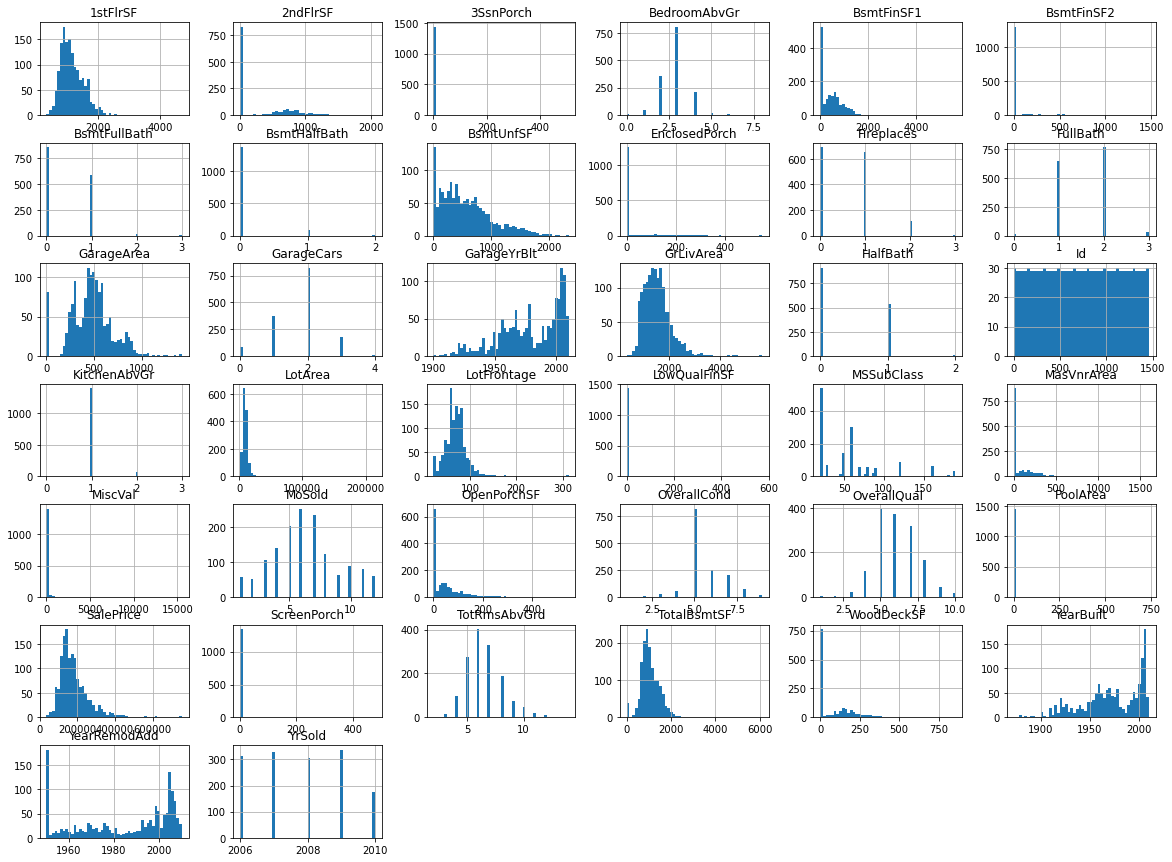

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

train_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()


# correlation Matrix

In [37]:
corr_matrix = train_df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# correlation scatter plot

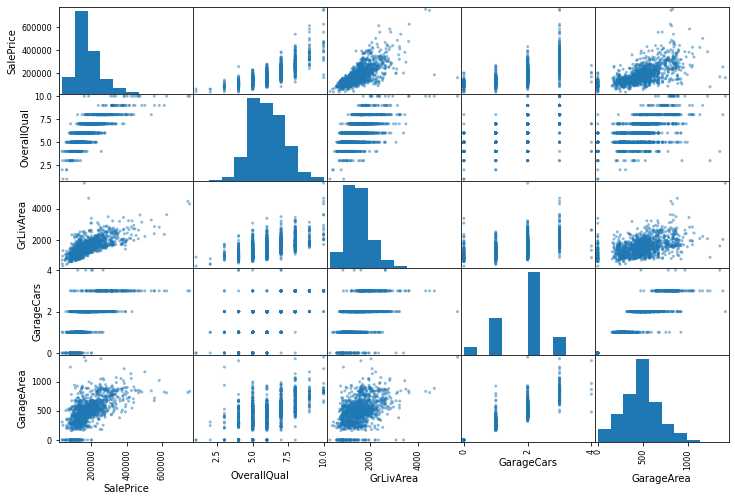

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", ]
scatter_matrix(train_df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

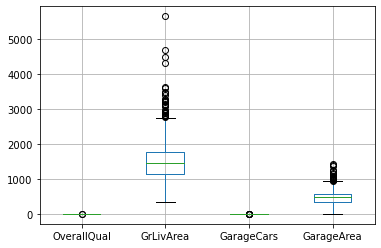

In [39]:
train_df.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])


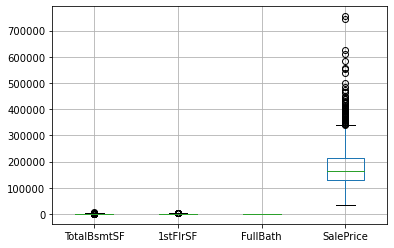

In [40]:
train_df.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [41]:
train_df.fillna(train_df.mean(), inplace = True)
test_df.fillna(test_df.mean(), inplace = True)

In [42]:
print(train_df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [43]:
print(test_df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


# Train and Build a Linear Regression Model

In [46]:
from sklearn.preprocessing import LabelEncoder

columns = ('GarageCond', 'RoofStyle', 'LandContour',  'Electrical', 'RoofMatl', 'Heating', 'Foundation', 'MiscFeature', 'SaleType', 'GarageType', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')

for col in columns:
    entrain = LabelEncoder()
    entrain.fit(list(train_df[col].values))
    train_df[col] = entrain.transform(list(train_df[col].values))

for col in columns:
    entest = LabelEncoder()
    entest.fit(list(test_df[col].values))
    test_df[col] = entest.transform(list(test_df[col].values))

      
X = train_df[train_df.columns[:80]]
Y = train_df['SalePrice']  
pre_value = test_df[test_df.columns[:80]]
seed = 7

from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=seed)
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()  
model.fit(X_train, Y_train)
values_predcited = model.predict(X_test)
print("R-Square value of above linear Regression model : ", model.score(X_train,Y_train))
print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)


R-Square value of above linear Regression model :  0.8472449703462936
Intercept: -103769.5886069581
Coefficients: [-1.75471093e-01 -1.28774216e+03 -1.05854288e+03 -1.59786309e+02
  3.81777924e-01  3.10237807e+04  5.22657978e+03 -9.79385305e+02
  3.43559731e+03 -5.54195958e+04 -1.21070045e+02  5.62318958e+03
  4.34842086e+02 -1.30314117e+03 -1.22963184e+04 -2.75022766e+03
 -9.90525368e+02  1.03523154e+04  4.70782281e+03  2.43110961e+02
  3.13028127e+01  2.19085024e+03  3.52134976e+03 -1.15047661e+03
  6.05875292e+02  3.77842195e+03  2.91363365e+01 -9.49839677e+03
  3.23263032e+02  1.19467860e+03 -9.15037166e+03  1.81474626e+03
 -4.14238085e+03 -7.28550192e+02 -3.02537633e-01  1.27840622e+03
  8.94532250e+00 -5.53619665e+00  3.10658809e+00 -2.37139562e+03
 -1.00916520e+03  6.78745400e+02 -1.09997847e+03  3.05217638e+01
  2.34148481e+01 -3.83291827e+01  1.56074293e+01  6.35525453e+03
 -2.45463410e+03  4.74067963e+03  1.19854394e+03 -4.14787116e+03
 -1.09383478e+04 -8.25170694e+03  5.25831

In [47]:
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.8653758311789058


In [48]:
pred = model.predict(pre_value)
pd.DataFrame({'Predicted Price of the House': pred})

,Predicted Price of the House
0,205296.590616
1,241614.144348
2,267332.996778
3,287540.099433
4,284864.723524
...,...
1454,176325.763055
1455,165783.483734
1456,253285.222850
1457,220800.103134
